# Анализ оттока клиентов «Метанпромбанка»

Материалы
* [Презентация](https://drive.google.com/drive/folders/16yPJ002mGxASOcAp_jm5duVx65ftb5Nh)

1. [Декомпозиция](#decomposition)
2. [Введение](#introduction)
3. [Загрузка данных](#getting)
    * [Вывод по разделу](#conclusion_getting)
4. [Предобработка данных](#preprocessing)
    * [Переименование столбцов](#columns_rename)
    * [Проверка на наличие некорректных значений](#incorrect_values)
    * [Проверка на наличие неявных дубликатов](#implicit_duplicates)
    * [Кодирование данных](#data_encoding)
    * [Обработка пропущенных значений](#missing_values)
    * [Создание дополнительных столбцов 'balance_thousand' , 'est_salary_thousand' и 'churn_word'](#converting_values)
    * [Вывод по разделу](#preprocessing_conclusion)
5. [Исследовательский анализ данных](#analys)  
* [Анализ распределения признаков](#analys_distribution)
   * [Анализ распределения непрерывных признаков](#analys_distribution_continuous_attribute)
     * [Анализ распределения клиентов по признаку "Баллы кредитного скоринга" в разрезе оттока](#analys_score)
     * [Анализ распределения клиентов по признаку "Возраст клиента" в разрезе оттока](#analys_age)
     * [Анализ распределения клиентов по признаку "Баланс на счете" в разрезе оттока](#analys_balance)
     * [Анализ распределения клиентов по признаку "Оценочный доход" в разрезе оттока](#analys_est_salary)  
   * [Анализ распределения дискретных и категориальных признаков](#analys_distribution_discrete_attribute)    
     * [Анализ распределения клиентов по признаку "Город" в разрезе оттока](#analys_city)
     * [Анализ распределения клиентов по признаку "Пол" в разрезе оттока](#analys_gender)
     * [Анализ распределения клиентов по признаку "Количество продуктов" в разрезе оттока](#analys_product)
     * [Анализ распределения клиентов по признаку "Количество баллов собственности" в разрезе оттока](#analys_equity)    
     * [Анализ распределения клиентов по признаку "Наличие кредитной карты" в разрезе оттока](#analys_credit_card)
     * [Анализ распределения клиентов по признаку "Активность клиента" в разрезе оттока](#analys_last_activity)
* [Корреляция признаков](#feature_correlation)  
* [Портрет клиента](#client_portret)
* [Статистический анализ данных](#hypothesis_testing)
  * [Проверка гипотезы о  различии дохода между теми клиентами, которые ушли, и теми, которые остались](#hypothesis_est_salary)
  * [Проверка гипотезы о  различии количества баллов собственности между теми клиентами, которые ушли, и теми, которые остались](#hypothesis_equity)
* [Вывод по разделу](#analys_conclusion)
6. [Сегментация клиентов](#customer_segmentation) 
* [Сегмент №1](#segment_one)
* [Сегмент №2](#segment_two)
* [Сегмент №3](#segment_three)
* [Вывод по разделу](#segment_conclusion)
7. [Приоритизация сегментов](#segment_prioritization)
* [Вывод по разделу](#segment_prioritization_conclusion)
8. [Вывод](#conclusion)
9. [Презентация](https://drive.google.com/drive/folders/16yPJ002mGxASOcAp_jm5duVx65ftb5Nh)

<a id="decomposition"></a> 
### Декомпозиция

1. Введение
* актуальность темы
* цель проекта
* задачи проекта
* структура данных
* этапы работы
2. Загрузка, первичный осмотр и предобработка данных
* переименование столбцов 'USERID', 'EST_SALARY'
* исследование и обработка некорректных значений
* исследование и обработка дубликатов
* исследование и обработка пропусков
  * кодирование данных столбцов 'gender', 'city'
  * кодирование данных столбцов 'age', 'balance' 
* выводы по разделу

3. Проведение исследовательского анализа данных
* анализ распределения признаков
  * без деления на выборки
  * в разрезе оттока
* анализ портретов клиентов в разрезе оттока
* корреляционный анализ
* выводы по разделу

4. Проверка статистическийх гипотез
* гипотеза о различии дохода между теми клиентами, которые ушли, и теми, которые остались
* гипотеза будет определена по мере проведения исследования 
* выводы по разделу

5. Работа с сегментами клиентов
* сегментация клиентов по уровню оттока
* приоритизация сегментов

* формирование таргетированных рекомендаций
* выводы по разделу

6. Презентация

<a id="introduction"></a> 
### Введение

__Актуальность темы исследования.__ «Метанпромбанк» в срочном порядке ищет аналитиков с уверенным владением «Python». Нашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка.

__Цель проекта:__ провести анализ оттока клиентов «Метанпромбанка».

__Задачи__ проекта:
1. Поиск и анализ оттока клиентов
2. Сегментирование клиентов  
3. Формирование таргетированных рекомендаций для отдела маркетинга


__Объект__ исследования: отток клиентов «Метанпромбанка».

__Предмет__ исследования: датасет bank_scrooge.csv, который содержит данные о клиентах «Метанпромбанка». 

__Структура__   bank_scrooge.csv:

* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

    
В дорожную карту проекта включили следующие этапы:
1. Загрузка, первичный осмотр данных
2. Предварительная обработка данных 
3. Проведение исследовательского анализа данных
4. Сегментация клиентов
5. Приоритизация сегментов
6. Выводы
7. Презентация

<a id="getting"></a> 
### Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# пишем функцию, которая даст информацию о датасете
def get_know_date(table):
    """Эта функция дает основную информацию о датасете, количестве пропущенных значений, количестве дубликатов.

    В качестве аргумента функция принимает название таблицы.
    """
    table.info()
    print('*'*50)
    print('Количество пропущенных значений:')
    print(table.isna().sum())
    print('*'*50)
    print('Количество дубликатов:', table.duplicated().sum())
    print('*'*50)      

In [4]:
# знакомимся с датасетом
bank = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
get_know_date(bank)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
**************************************************
Количество пропущенных значений:
USERID              0
score               0
city                0
gender              0
age                26
equity            

In [5]:
bank.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


<a id="conclusion_getting"></a> 
__Мы познакомились с данными. Что имеем:__
1. Таблица 'bank_scrooge.csv':
* содержит  10000 строк, 12 столбцов;
* столбцы 'USERID', 'EST_SALARY' имеют некорректные названия;
* тип данных в столбцах соответствует содержанию;
* есть пропущенные значения в столбцах 'age' (26), 'balance' (2295); 
* дубликаты отсутствуют.
            
__Вывод:__ необходимо сделать предварительную обработку данных.

<a id="preprocessing"></a> 
### Предобработка данных

<a id="columns_rename"></a> 
#### Переименование столбцов

In [6]:
# дадим корректные названия столбцам
bank = bank.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

<a id="incorrect_values"></a> 
#### Проверка  на наличие некорректных значений

In [7]:
# посмотрим уникальные значения в столбце 'city'
bank['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Значения в столбце 'city' соответствуют техническому заданию

In [8]:
# посмотрим уникальные значения в столбце 'gender'
bank['gender'].unique()

array(['Ж', 'М'], dtype=object)

Значения в столбце 'gender' соответствуют техническому заданию

In [9]:
# посмотрим уникальные значения в столбце 'product'
bank['products'].unique()

array([2, 3, 1, 4, 5, 0])

* Значение '0' в столбце 'products' некорректно. Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом
* Найдем строки, в которых 'products' = 0

In [10]:
bank.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1


* Найден один клиент - женщина в возрасте 79 лет с отсутствием сведений по признаку 'balance', без кредитной карты, без банковских продуктов, без активности, с признаком оттока.
* Удалим эту строку, как строку с некорректным значением в столбце 'products'.

In [11]:
bank = bank.query('products !=0')

In [12]:
# посмотрим уникальные значения в столбце 'equity'
bank['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

Значения в столбце 'equity' корректные

In [13]:
# посмотрим уникальные значения в столбце 'churn'
bank['churn'].unique()

array([1, 0])

Значения в столбце 'churn' соответствуют техническому заданию

In [14]:
# посмотрим уникальные значения в столбце 'credit_card'
bank['credit_card'].unique()

array([0, 1])

Значения в столбце 'credit_card' соответствуют техническому заданию

In [15]:
# посмотрим уникальные значения в столбце 'last_activity'
bank['last_activity'].unique()

array([1, 0])

Значения в столбце 'last_activity' соответствуют техническому заданию

<a id="implicit_duplicates"></a> 
#### Проверка  на наличие неявных дубликатов

In [16]:
# проверим наличие дубликатов в столбце 'user_id'
bank.duplicated(['user_id']).sum()

73

In [17]:
# проверим наличие дубликатов по столбцам 'user_id' и 'city'
bank.duplicated(['user_id','city']).sum()

0

Так как по полям 'user_id' и 'city' строки не дублируются, позволим себе предположить, что значительное количество дубликатов по столбцу'user_id' объясняется тем, что в разных филиалах банка разным клиентам были присвоены одинаковые идентификационные номера.

<a id="data_encoding"></a> 
#### Кодирование данных

Для дальнейшего анализа выполним кодирование столбцов с категориальными значениями 'gender', 'city'

In [18]:
# создадим копии столбцов 'gender' и'city'
bank['gender_kod'] = bank['gender']
bank['city_kod'] = bank['city']

In [19]:
# выполним кодирование данных
bank = pd.get_dummies(bank, columns = ['gender_kod', 'city_kod'])
bank = bank.rename (
            columns = ({'gender_kod_Ж':'women', 'gender_kod_М':'men',
                        'city_kod_Ростов':'rostov', 'city_kod_Рыбинск':'rybinsk','city_kod_Ярославль':'yaroslavl'}))
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,women,men,rostov,rybinsk,yaroslavl
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


<a id="missing_values"></a> 
#### Обработка пропущенных значений

Мы обнаружили пропуски в столбцах 'balance' и 'age'. Принимать решение об обработке пропусков в этих столбцах будем на основе матрицы корреляции Пирсона.

In [20]:
# создадим столбцы 'balance_nan' и 'age_nan' с новым признаком, принимающим '1', если в столбце пропущено значение признака,
# и 0, если значение признака не пропущено. 
bank['balance_nan'] = bank['balance'].apply(lambda x: 0 if x>=0 else 1)
bank['age_nan']     = bank['age'].apply(lambda x: 0 if x>=0 else 1)

In [21]:
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,women,men,rostov,rybinsk,yaroslavl,balance_nan,age_nan
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,0,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,0,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,0,0


In [22]:
bank_corr = bank.corr()

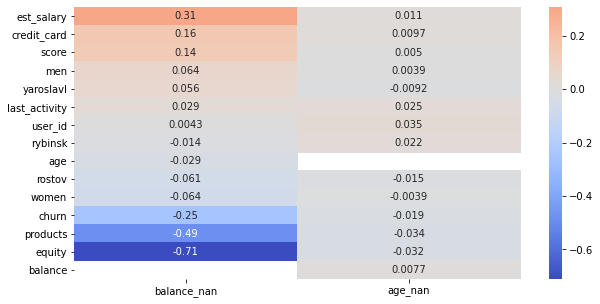

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    bank_corr.loc[:,['balance_nan', 'age_nan']].drop(['balance_nan','age_nan']).sort_values('balance_nan', ascending = False),
    annot = True, cmap='coolwarm', center=0);

1. Пропущенные значения в столбце 'balance' относятся к группе MNAR - отсутствуют не случайно:
* Значения коэффициента корреляции между признаком 'balance_nan' (наличие пропусков в столбце 'balance') и другими признаками -0.7 < r < 0.3, что указывает на очень слабую силу связи (согласно шкале Чеддока). 
* без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
2. Пропущенные значения в столбце 'age' относятся к группе MCAR - отсутствуют совершенно случайно:
* Значения коэффициента корреляции между признаком 'age_nan' (наличие пропусков в столбце 'age') и другими признаками слишком низкие (-0.03 < r < 0.035), что указывает на очень слабую силу связи (согласно шкале Чеддока).
* можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными.
3. Подтверждаем отсутствие зависимости признаков наличия пропусков в столбцах 'balance' и 'age' от других данных. Позволим себе оставить пропуски в столбцах 'balance' и 'age' без изменения и без заполнения.

<a id="converting_values"></a> 
#### Создание дополнительных столбцов 'balance_thousand' , 'est_salary_thousand' и 'churn_word'

In [24]:
# добавим столбцы 'balance_thousand' и 'est_salary_thousand', в которых сохраним значения стобцов 'balance' и 'est_salary' 
# соответственно в тысячах рублей. Это будет необходимо для дальнейшей работы.
bank['balance_thousand'] = bank['balance'].apply(lambda x: x/1000)
bank['est_salary_thousand'] = bank['est_salary'].apply(lambda x: x/1000)

# добавим столбец 'churn_word', в котором сохраним текстовое значение столбца 'churn'
bank['churn_word'] = bank['churn'].apply(lambda x: "net" if x==0 else "ottok")

<a id="preprocessing_conclusion"></a> 
__Мы выполнили предварительную обработку данных:__
* дали корректные названия столбцам 'USERID', 'EST_SALARY';
* убедились в отсутствии некорректных значений в столбцах 'city', 'gender', 'equity', 'churn', 'credit_card', 'last_activity';
* удалили строку с некорректным значением в столбце 'products';
* убедились в отсутствии неявных дубликатов по столбцам 'user_id' и 'city';
* выполнили кодирование столбцов с категориальными значениями 'gender', 'city';
* по матрице корреляции Пирсона выяснили отсутствие зависимости пропусков в столбцах 'balance' и 'age' с другими признаками, на основании этого приняли решение оставить пропущенные значения без изменения;
* создали дополнительные столбцы 'balance_thousand' , 'est_salary_thousand' и 'churn_word', которые пригодятся в исследовании.

__Вывод:__ Данные готовы к дальнейшей работе.

<a id="analys"></a> 
### Исследовательский анализ данных

<a id="analys_distribution"></a> 
#### Анализ распределения признаков

<a id="analys_distribution_continuous_attribute"></a> 
##### Анализ распределения непрерывных признаков

* анализ непрерывных переменных будем проводить с помощью гистограмм 'sns.histplot()'
* по графикам мы найдем интервалы признака, на которых отток выше, чем лояльность

<a id="analys_score"></a> 
######  Анализ распределения клиентов по признаку "Баллы кредитного скоринга" в разрезе оттока

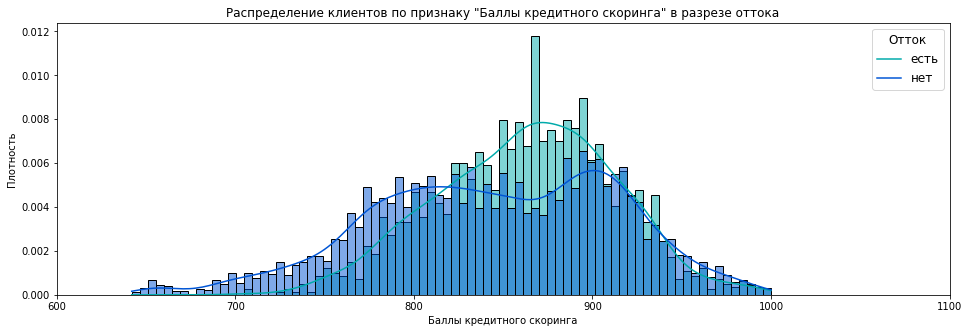

In [25]:
plt.figure(figsize=(16, 5))
# строим гистограмму для столбца 'score', добавив график кривой KDE
sns.histplot(x='score', data=bank, hue = 'churn', bins = 80,  kde=True, stat="density", common_norm=False, palette = 'winter')
# ограничиваем ось X для наглядности
plt.xlim(600, 1100)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение клиентов по признаку "Баллы кредитного скоринга" в разрезе оттока')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.legend(['есть', 'нет'], title = 'Отток', loc='upper right', title_fontsize = 12, fontsize = 12)
# отображаем график на экране
plt.show()

"Баллы кредитного скоринга" - непрерывный признак. Отток выше, чем лояльность, на интервале 820- 940

<a id="analys_age"></a> 
##### Анализ распределения клиентов по признаку "Возраст клиента" в разрезе оттока

В столбце 'age' мы обнаружили 26 пропущенных значений. При построении гистограммы с помощью фильтра исключим эти значения.

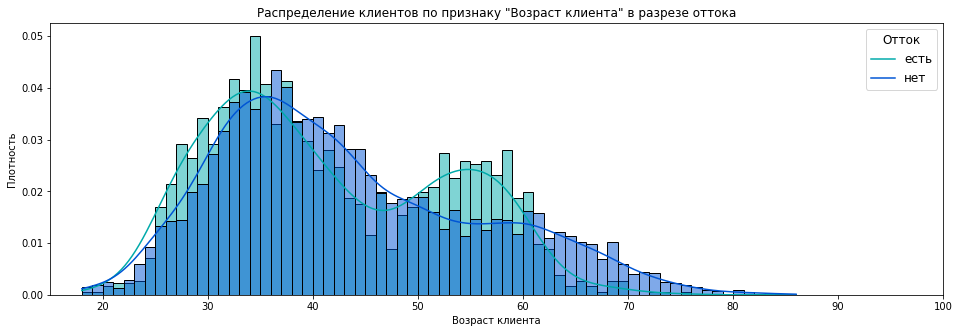

In [26]:
# строим гистограмму для столбца 'age', добавив график кривой KDE
plt.figure(figsize=(16, 5))
sns.histplot(x='age',data=bank.query('age > 0'),hue = 'churn',binwidth = 1,kde=True,stat="density",common_norm=False, palette = 'winter')
# ограничиваем ось X для наглядности
plt.xlim(15, 100)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение клиентов по признаку "Возраст клиента" в разрезе оттока')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность')
plt.legend(['есть', 'нет'], title = 'Отток', loc='upper right', title_fontsize = 12, fontsize = 12)
# отображаем график на экранеиь
plt.show()

"Возраст клиента" - непрерывный признак. Отток выше, чем лояльность, на интервалах: 26 - 36, 51 - 61.

<a id="analys_balance"></a> 
#####  Анализ распределения клиентов по признаку "Баланс на счете" в разрезе оттока

В столбце 'balance' мы обнаружили 2295 пропущенных значений. При построении гистограммы с помощью фильтра исключим эти значения.

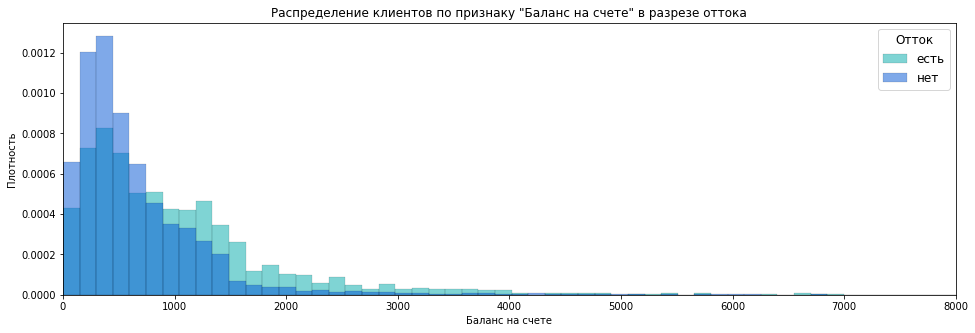

In [27]:
# строим гистограмму для столбца 'balance'
plt.figure(figsize=(16, 5))
sns.histplot(x='balance_thousand', data=bank.query('balance_thousand > 0'), hue = 'churn', bins = 800,  stat="density",\
             common_norm=False, palette = 'winter')
# ограничиваем ось X для наглядности
plt.xlim(0, 8000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение клиентов по признаку "Баланс на счете" в разрезе оттока')
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.legend(['есть', 'нет'], title = 'Отток', loc='upper right', title_fontsize = 12, fontsize = 12)
# отображаем график на экране
plt.show()

"Баланс на счете" - непрерывный признак. Отток выше, чем лояльность, на интервале: 860 тыс.руб - 4000 тыс.руб.

<a id="analys_est_salary"></a> 
#####  Анализ распределения клиентов по признаку "Оценочный доход" в разрезе оттока

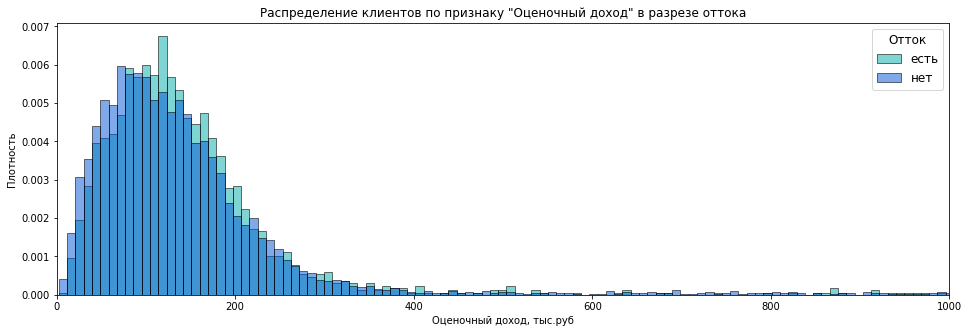

In [28]:
# строим гистограмму для столбца 'est_salary_thousand'
plt.figure(figsize=(16, 5))
sns.histplot(x='est_salary_thousand', data=bank, hue = 'churn', bins = 150,  stat="density", \
             common_norm=False, palette = 'winter')
# ограничиваем ось X для наглядности
plt.xlim(0, 1000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение клиентов по признаку "Оценочный доход" в разрезе оттока')
plt.xlabel('Оценочный доход, тыс.руб')
plt.ylabel('Плотность')
plt.legend(['есть', 'нет'], title = 'Отток', loc='upper right', title_fontsize = 12, fontsize = 12)
# отображаем график на экране
plt.show()

"Оценочный доход" - непрерывный признак. Отток выше, чем лояльность, на интервалах: 86 тыс.руб - 238 тыс.руб., 314 тыс.руб. - 400 тыс.руб.

<a id="analys_distribution_discrete_attribute"></a> 
##### Анализ распределения дискретных и категориальных признаков

* Анализ дискретных и категориальных признаков будем проводить с помощью столбчатых диаграмм 'barplot()'.
* Также на графиках построим 'plt.axhline()' со средним уровнем оттока по банку- по нему мы будем определять, что значение признака более склонно к оттоку (если уровень оттока признака выше, чем в среднем по банку - считаем, что признак влияет сильно).

In [29]:
print('Среднее значение оттока по банку:', round(bank['churn'].agg('mean')*100, 2), '%')

Среднее значение оттока по банку: 18.19 %


<a id="analys_city"></a> 
######  Анализ распределения клиентов по признаку "Город" в разрезе оттока

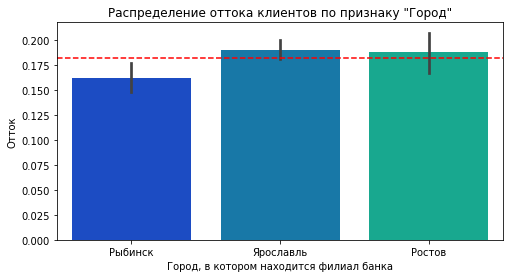

In [30]:
# строим столбчатую диаграмму для столбца 'city'
plt.figure(figsize=(8, 4))
sns.barplot(data = bank, x='city', y = 'churn', palette = 'winter')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Город"')
plt.xlabel('Город, в котором находится филиал банка')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()

* клиенты в Ярославле и Ростове более склонны к оттоку
* клиенты в Рыбинске менее склонны к оттоку

<a id="analys_gender"></a> 
#####  Анализ распределения клиентов по признаку "Пол" в разрезе оттока

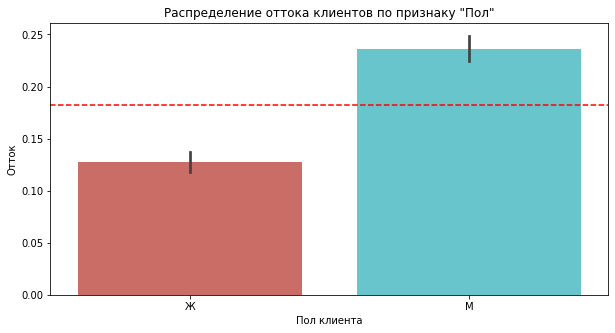

In [31]:
# строим столбчатую диаграмму для столбца 'gender'
plt.figure(figsize=(10, 5))
#sns.color_palette("rocket")
sns.barplot(data = bank, x='gender', y = 'churn', palette = 'hls')
#sns.barplot(data = bank, x='gender', y = 'churn', color = '#bdd0d7')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Пол"')
plt.xlabel('Пол клиента')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()


* мужчины более склонны к оттоку
* женщины менее склонны к оттоку 

<a id="analys_products"></a> 
#####  Анализ распределения клиентов по признаку "Количество продуктов" в разрезе оттока

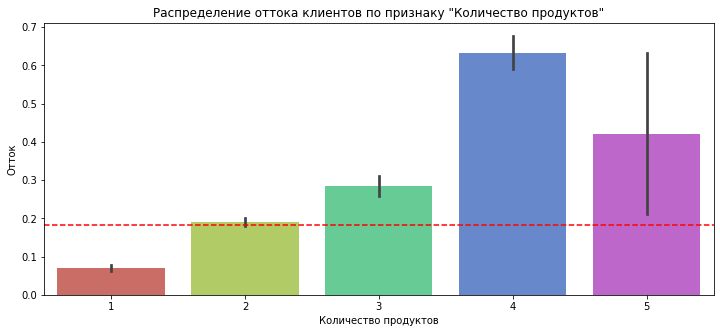

In [32]:
# строим столбчатую диаграмму для столбца 'products'
plt.figure(figsize=(12, 5))
sns.barplot(data = bank, x='products', y = 'churn', palette = 'hls')
#sns.barplot(data = bank, x='products', y = 'churn', palette = 'crest')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Количество продуктов"')
plt.xlabel('Количество продуктов')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()


* клиенты с количеством продуктов от 2 до 5 более склонны к оттоку
* клиенты с одним продуктом менее склонны к оттоку 

<a id="analys_equity"></a> 
#####  Анализ распределения клиентов по признаку "Количество баллов собственности" в разрезе оттока

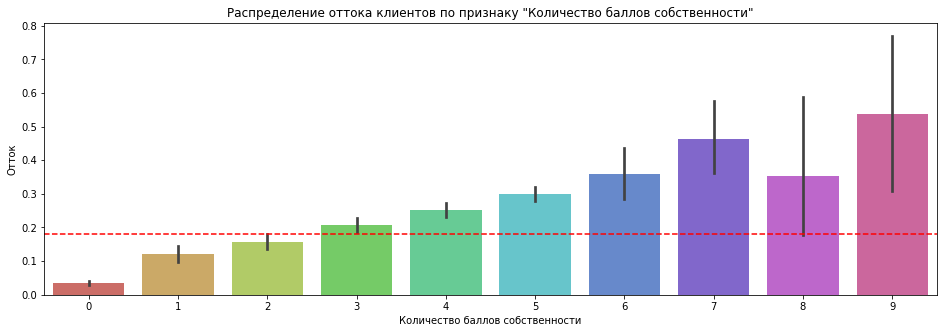

In [33]:
# строим столбчатую диаграмму для столбца 'equity'
plt.figure(figsize=(16, 5))
sns.barplot(data = bank, x='equity', y = 'churn', palette = 'hls')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Количество баллов собственности"')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()

* клиенты с количеством баллов собственности от 3 до 9 более склонны к оттоку
* клиенты с количеством баллов собственности от 0 до 2 менее склонны к оттоку 

<a id="analys_credit_card"></a> 
#####  Анализ распределения клиентов по признаку "Наличие кредитной карты" в разрезе оттока

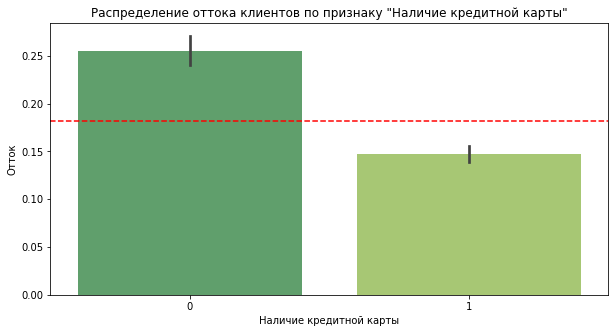

In [34]:
# строим столбчатую диаграмму для столбца 'credit_card'
plt.figure(figsize=(10, 5))
sns.barplot(data = bank, x='credit_card', y = 'churn', palette = 'summer')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Наличие кредитной карты"')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()

* клиенты без кредитной карты более склонны к оттоку
* клиенты с кредитной картой менее склонны к оттоку 

<a id="analys_last_activity"></a> 
#####  Анализ распределения клиентов по признаку "Активность клиента" в разрезе оттока

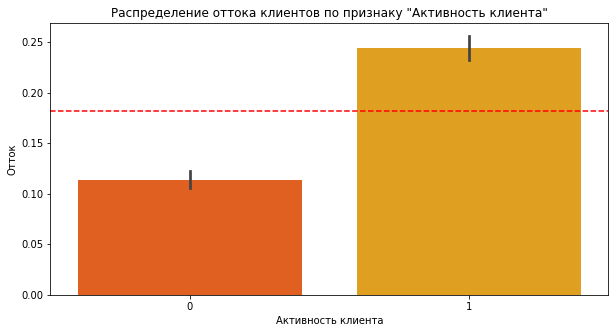

In [35]:
# строим столбчатую диаграмму для столбца 'last_activity'
plt.figure(figsize=(10, 5))
sns.barplot(data = bank, x='last_activity', y = 'churn', palette = 'autumn')
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение оттока клиентов по признаку "Активность клиента"')
plt.xlabel('Активность клиента')
plt.ylabel('Отток')
plt.axhline(y=bank['churn'].agg('mean'), color = 'red', linestyle = '--' )
# отображаем график на экране
plt.show()

* активные клиенты более склонны к оттоку
* неактивные клиенты менее склонны к оттоку 

<a id="feature_correlation"></a> 
#### Корреляция признаков 

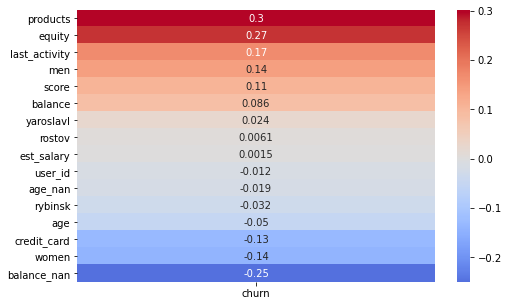

In [36]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    bank_corr.loc[:,['churn']].drop('churn').sort_values('churn', ascending = False),
    annot = True, cmap='coolwarm', center=0);

Значения коэффициента корреляции между признаком 'churn' и другими признаками и их интерпритация по шкале Чеддока

| Признак                           | Отток          | Интерпретация по шкале Чеддока    |  
| ---------------------------------:|:---------------| -------------------------------- :|
| Мужчины                           | r =  0.14      | слабая сила связи                 | 
| Женщины                           | r = -0.14      | слабая сила связи                 | 
| Возраст  клиента                  | r = -0.05      | слабая сила связи                 |
| Количество продуктов              | r =  0.3       | слабая сила связи                 | 
| Количество баллов собственности   | r =  0.27      | слабая сила связи                 |   
| Баланс на счете                   | r =  0.086     | слабая сила связи                 | 
| Оценочный доход                   | r =  0.0015    | слабая сила связи                 |   
| Ярославль                         | r =  0.024     | слабая сила связи                 | 
| Ростов                            | r =  0.0061    | слабая сила связи                 | 
| Рыбинск                           | r = -0.032     | слабая сила связи                 | 
| Наличие кредитной карты           | r = -0.13      | слабая сила связи                 | 
| Активность                        | r =  0.17      | слабая сила связи                 | 
| Баллы кредитного скоринга         | r =  0.11      | слабая сила связи                 | 

<a id="client_portret"></a> 
#### Портрет клиента

In [37]:
bank_turget = bank.pivot_table(columns='churn_word', values=['age', 'balance', 'equity', 'est_salary', 'products','score'],\
                                    aggfunc={'age'       : 'mean',
                                             'balance'   : 'mean',
                                             'est_salary': 'mean',
                                             'score'     : 'median',
                                             'products'  : 'median',
                                             'equity'    : 'median'}).reset_index()

bank_turget['delta,%'] = abs((bank_turget['net']-bank_turget['ottok'])/((bank_turget['net'] + bank_turget['ottok'])/2))*100
bank_turget

churn_word,index,net,ottok,"delta,%"
0,age,43.02,41.43,3.77
1,balance,733982.59,1133993.27,42.83
2,equity,3.00,4.00,28.57
3,est_salary,147783.20,148310.73,0.36
4,products,2.00,2.00,0.00
5,score,848.00,866.00,2.10


In [38]:
bank_mode = bank.pivot_table(columns='churn_word', values=['city', 'gender','credit_card', 'last_activity'],\
                             aggfunc={'city': pd.Series.mode, 
                                      'gender' : pd.Series.mode,
                                      'credit_card':pd.Series.mode,
                                      'last_activity': pd.Series.mode }).reset_index()
bank_mode

churn_word,index,net,ottok
0,city,Ярославль,Ярославль
1,credit_card,1,1
2,gender,Ж,М
3,last_activity,0,1


In [39]:
bank_turget = bank_turget.append(bank_mode, ignore_index = True)
bank_turget

churn_word,index,net,ottok,"delta,%"
0,age,43.02,41.43,3.77
1,balance,733982.59,1133993.27,42.83
2,equity,3.00,4.00,28.57
3,est_salary,147783.20,148310.73,0.36
4,products,2.00,2.00,0.00
5,score,848.00,866.00,2.10
6,city,Ярославль,Ярославль,NaN
7,credit_card,1,1,NaN
8,gender,Ж,М,NaN
9,last_activity,0,1,NaN


In [40]:
bank_turget.columns = ['Признак', 'Нет оттока', 'Есть отток', 'Относительная разница,%']
bank_turget.loc[0, 'Признак'] = bank_turget.loc[0, 'Признак'].replace('age', 'Средний возраст')
bank_turget.loc[1, 'Признак'] = bank_turget.loc[1, 'Признак'].replace('balance', 'Средний баланс на счете')
bank_turget.loc[2, 'Признак'] = bank_turget.loc[2, 'Признак'].replace('equity', 'Медианное количество собственности')
bank_turget.loc[3, 'Признак'] = bank_turget.loc[3, 'Признак'].replace('est_salary', 'Средний доход')
bank_turget.loc[4, 'Признак'] = bank_turget.loc[4, 'Признак'].replace('products', 'Медианное количество продуктов')
bank_turget.loc[5, 'Признак'] = bank_turget.loc[5, 'Признак'].replace('score', 'Медианный скоринг')
bank_turget.loc[6, 'Признак'] = bank_turget.loc[6, 'Признак'].replace('city', 'Мода по городу')
bank_turget.loc[7, 'Признак'] = bank_turget.loc[7, 'Признак'].replace('credit_card', 'Мода по наличию кредитной карты')
bank_turget.loc[8, 'Признак'] = bank_turget.loc[8, 'Признак'].replace('gender', 'Мода по полу')
bank_turget.loc[9, 'Признак'] = bank_turget.loc[9, 'Признак'].replace('last_activity', 'Мода по активности')
bank_turget

,Признак,Нет оттока,Есть отток,"Относительная разница,%"
0,Средний возраст,43.02,41.43,3.77
1,Средний баланс на счете,733982.59,1133993.27,42.83
2,Медианное количество собственности,3.00,4.00,28.57
3,Средний доход,147783.20,148310.73,0.36
4,Медианное количество продуктов,2.00,2.00,0.00
5,Медианный скоринг,848.00,866.00,2.10
6,Мода по городу,Ярославль,Ярославль,NaN
7,Мода по наличию кредитной карты,1,1,NaN
8,Мода по полу,Ж,М,NaN
9,Мода по активности,0,1,NaN


<a id="hypothesis_testing"></a> 
#### Статистический анализ данных

Мы имеем две выборки: отточные клиенты и оставшиеся клиенты. Посмотрим размер этих выборок.

In [41]:
print(
    'Количество отточных клиентов:  ', bank.query('churn == 1')['user_id'].count(),
    'чел.', '\nКоличество оставшихся клиентов:', bank.query('churn == 0')['user_id'].count(),'чел.'
)

Количество отточных клиентов:   1819 чел. 
Количество оставшихся клиентов: 8180 чел.


Для выявления выбросов построим диаграммы размаха для признаков 'Оценочный доход' и 'Количество баллов собственности'

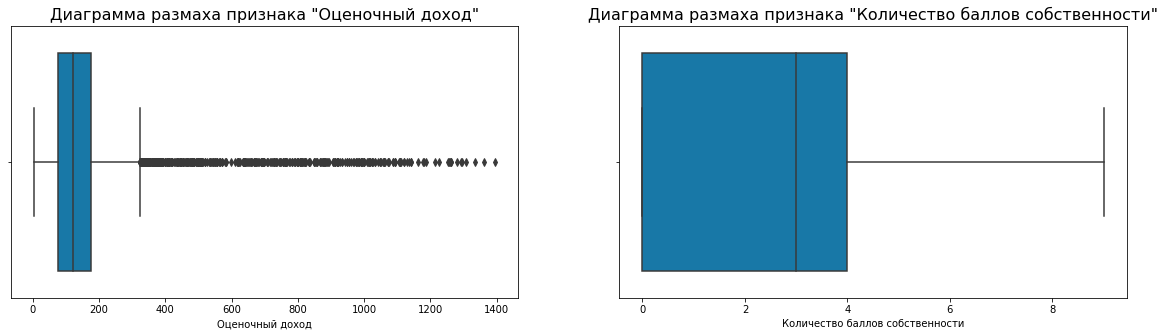

In [42]:
fig1 = plt.figure(figsize = (20,5))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x=bank['est_salary_thousand'], palette = 'winter')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x=bank['equity'], palette = 'winter')

#plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 22)
ax1.set_title('Диаграмма размаха признака "Оценочный доход"', fontsize = 16)
ax2.set_title('Диаграмма размаха признака "Количество баллов собственности"', fontsize = 16)
ax1.set_xlabel('Оценочный доход')
ax2.set_xlabel('Количество баллов собственности')
plt.show()

<a id="hypothesis_est_salary"></a> 
##### Гипотеза о  различии дохода между теми клиентами, которые ушли, и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы:
* H0: средние оценочные доходы оставшихся и отточных клиентов равны.
* H1: средние оценочные доходы оставшихся и отточных клиентов не равны.

* В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, используют непараметрический тест Генри Манна и Доналда Уитни для независимых выборок.
* Метод, который будем применять для сравнения гипотез, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»). 
* Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные. 
А нетипичные сдвиги по рангу рассматриваются как изменения. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.
Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.
* Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [43]:
alpha = 0.05 # задаем критический уровень статистической значимости

results = st.mannwhitneyu(bank.query('churn ==0')['est_salary'], bank.query('churn ==1')['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


__Вывод__
* Полученное значение p-value меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу.
* Есть основания говорить, что средние оценочные доходы оставшихся и отточных клиентов не равны.

<a id="hypothesis_equity"></a> 
##### Гипотеза о  различии количества баллов собственности между теми клиентами, которые ушли, и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы:
* H0: среднее количество баллов собственности оставшихся и отточных клиентов равно.
* H1: среднее количество баллов собственности оставшихся и отточных клиентов не равно.

Проверку гипотез будем выполнять с помощью t-теста. Мы можем применить этот тест, т.к. у нас выполняются необходимые условия:
1. Генеральные совокупности не зависят друг от друга. 
2. Выборочные средние нормально распределены. 
* Это условие не является препятствием благодаря центральной предельной теореме (сокращённо ЦПТ), которая звучит так: сумма независимых одинаково распределённых случайных величин стремится к нормальному распределению по мере увеличения их количества.
* Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
* Мы имеем две выборки: количество отточных клиентов 1819 чел., количество оставшихся клиентов 8180 чел. Размеры выборок достаточны для выполнения ЦПТ.
3. Дисперсии рассматриваемых генеральных совокупностей равны. 
* Это коварное условие. С одной стороны, мы никогда точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей, с другой — по умолчанию параметр equal_var принимает значение True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить.
* Мы имеем выборки разного размера, поэтому укажем значение параметра  equal_var = False для того, чтобы тест посчитал дисперсии выборок по отдельности.
* В данных нет выбросов

In [44]:
alpha = 0.05

results = st.ttest_ind (
    bank.query('churn == 0')['equity'],
    bank.query('churn == 1')['equity'], equal_var = False)
 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.341323077798851e-197
Отвергаем нулевую гипотезу


__Вывод__ 
* Полученное значение p-value меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу.
* Есть основания говорить, что среднее количество баллов собственности оставшихся и отточных клиентов не равно.

<a id="analys_conclusion"></a> 
#### Выводы по разделу "Анализ данных" 
1. Проведен анализ распределения признаков, на основании которого выяснили, что более склонны к оттоку клиенты:
    * мужчины
    * проживающие в Ярославле и Ростове
    * в возрасте от 26 до 36 и от 51-61 лет
    * с оценочным доходом от 86 до 238 тыс. руб и от 314 до 400 тыс.руб
    * с балансом на счете от 714 до 400 тыс. руб.
    * не имеющие кредитной карты
    * с количеством баллов кредитного скоринга от 820 до  940
    * с количеством баллов собственности от 3 до 9
    * с количеством банковских продуктов от 2 до 5
    * активные пользователи банковских продуктов
2. Выяснили корреляционную зависимость между показателем оттока и другими признаками.Значения коэффициента корреляции между признаком 'churn' и другими признаками очень низкие (-0.25 < r < 0.3), что указывает на очень слабую силу связи (согласно шкале Чеддока).      
3. Построили портрет клиента
4. Проверили две гипотезы и выяснили, что
* Есть основания говорить, что средние оценочные доходы оставшихся и отточных клиентов не равны.
* Есть основания говорить, что среднее количество баллов собственности оставшихся и отточных клиентов не равно.
5. На основании проведенного анализа к целевой аудитории клиентов с высоким уровнем оттока отнесем мужчин, обслуживающихся в Ярославле и Ростове, не имеющих кредитной карты. Разделим их на сегменты по следующим признакам:
* количество продуктов
* количество баллов собственности
* оценочный доход 

<a id="customer_segmentation"></a> 
### Сегментация клиентов

1. По итогам анализа мы выделили целевую аудиторию клиентов с высоким уровнем оттока. Это мужчины, обслуживающиеся в Ярославле и Ростове, не имеющие кредитной карты. 
2. По итогам анализа мы выбрали признаки, которые лягут в основу сегментации: количество продуктов, количество баллов собственности, оценочный доход. 
3. Мы выявили интервалы/значения этих признаков, на которых отток выше, чем лояльность.Таким образом сегментацию целевой аудитории будем проводить по следующим критериям:
* количество продуктов: больше двух
* количество баллов собственности: больше трех
* оценочный доход: от 86 до 238 тыс. руб и от 314 до 400 тыс.руб  
4. В ходе исследования мы рассчитали долю оттока клиентов банка, этот показатель равен 0,18. Важно, чтобы в сегментах доля оттока была выше, чем в среднем по банку.  

<a id="segment_one"></a> 
#### Сегмент №1

* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Количество баллов собственности: больше трех

In [45]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №1:',
       bank.query('men == 1 and \
                   rybinsk == 0 and \
                   credit_card == 0  and \
                   equity >=3') \
        ['user_id'].count())

# Рассчитаем долюотточных клиентов в этом сегменте:
print ('Доля отточных клиентов в сегменте №1:',
       round(bank.query('men == 1 and \
                         rybinsk == 0 and \
                         credit_card == 0  and \
                         equity >=3') \
        ['churn'].agg('mean'), 2))

Общее число клиентов в сегменте №1: 625
Доля отточных клиентов в сегменте №1: 0.49


<a id="segment_two"></a> 
#### Сегмент №2

* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Количество продуктов: больше двух

In [46]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №1:',
       bank.query('men == 1 and \
                   rybinsk == 0 and \
                   credit_card == 0  and \
                   products >= 2') \
       ['user_id'].count())

# Рассчитаем долю отточных клиентов в этом сегменте:
print ('Доля отточных клиентов в сегменте №1:',
       round(bank.query('men == 1 and \
                         rybinsk == 0 and \
                         credit_card == 0  and \
                         products >= 2') \
        ['churn'].agg('mean'), 2))

Общее число клиентов в сегменте №1: 752
Доля отточных клиентов в сегменте №1: 0.43


<a id="segment_three"></a> 
#### Сегмент №3

* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Оценочный доход: 86 тыс.руб. - 238 тыс.руб.

In [47]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №1:',
       bank.query('men == 1 and \
                   rybinsk == 0 and \
                   credit_card == 0  and \
                   est_salary_thousand >= 86 and est_salary_thousand <= 238') \
       ['user_id'].count())

# Рассчитаем долю отточных клиентов в этом сегменте:
print ('Доля отточных клиентов в сегменте №1:',
       round(bank.query('men == 1 and \
                         rybinsk == 0 and \
                         credit_card == 0  and \
                         est_salary_thousand >= 86 and est_salary_thousand <= 238') \
        ['churn'].agg('mean'), 2))

Общее число клиентов в сегменте №1: 539
Доля отточных клиентов в сегменте №1: 0.42


<a id="segment_conclusion"></a> 
#### Выводы по разделу "Сегментация клиентов" 
Мы выделили три сегмента клиентов банка

| Признак              | Сегмент 1      | Сегмент 2       | Сегмент 3       |  
| --------------------:|-------------- :| -------------- :| -------------- :|
| Пол                  | мужской        | мужской         |  мужской        |  
| Город                | не Рыбинск     | не Рыбинск      |  не Рыбинск     | 
| Кредитная карта      | нет            | нет             |  нет            |  
| Количество продуктов |                | больше 2        |                 |
| Баллы собственности  | больше 3       |                 |                 | 
| Доход                |                |                 |  86-238 тыс.руб.|   
|                      |                |                 |                 |
| Кол-во клиентов      | 625            | 752             |  539            |   
| Доля оттока          | 0.49           | 0.43            |  0.42           |   


<a id="segment_prioritization"></a> 
### Приоритизация сегментов

В связи с тем, что отдел маректинга включает только двух работников, и  у них нет автоматизированных систем, все мероприятия, рассылки и агитации будут выполнены ручным трудом. Поэтому важно приоритизировать сегменты, чтобы маркетинг знал, на что обратить внимание в первую очередь в случае, если ресурсов маркетинга не хватит на охват всех выделенных сегментов.  Будем приоритизировать сегменты по мере уменьшения доли  отточных клиентов.
1. Приоритет №1 
* Сегмент №1
  * Пол: мужской  
  * Город: не Рыбинск  
  * Кредитная карта: нет
  * Количество баллов собственности: больше трех
  * Количество клиентов: 625
  * Доля оттока: 0.49
2. Приоритет №2
* Сегмент № 2
  * Пол: мужской  
  * Город: не Рыбинск  
  * Кредитная карта: нет
  * Количество продуктов: больше двух
  * Количество клиентов: 752
  * Доля оттока: 0.43
3. Приоритет №3
* Сегмент № 3
  * Пол: мужской  
  * Город: не Рыбинск  
  * Кредитная карта: нет
  * Оценочный доход: 86 тыс.руб. - 238 тыс.руб.
  * Количество клиентов: 539
  * Доля оттока: 0.42

<a id="segment_prioritization_conclusion"></a> 
#### Выводы по разделу "Приоритизация сегментов"

Завершен __седьмой__ этап работы над проектом
На этом этапе мы выполнили приоритизацию сегментов
* Приоритет №1 - Сегмент №1 - Количество клиентов 625 - Доля оттока 0.49
* Приоритет №2 - Сегмент №2 - Количество клиентов 752 - Доля оттока 0.43
* Приоритет №3 - Сегмент №3 - Количество клиентов 539 - Доля оттока 0.42

<a id="conclusion"></a>
### Вывод
    
__Цель__ нашего проекта заключалась в том, чтобы провести анализ оттока клиентов «Метанпромбанка».

__Задачи__ проекта:
1. Поиск и анализ оттока клиентов
2. Сегментирование клиентов  
3. Формирование таргетированных рекомендаций для отдела маркетинга

В нашем распоряжении датасет:
* датасет bank_scrooge.csv, который содержит данные о клиентах «Метанпромбанка».

Работу распределили на семь этапов.

На этапах __"Знакомство с данными" и "Предварительная обработка данных"__  мы познакомились с данными и провели предварительную обработку:
* дали корректные названия столбцам 'USERID', 'EST_SALARY';
* убедились в отсутствии некорректных значений в столбцах 'city', 'gender', 'equity', 'churn', 'credit_card', 'last_activity';
* удалили строку с некорректным значением в столбце 'products';
* убедились в отсутствии неявных дубликатов по столбцам 'user_id' и 'city';
* выполнили кодирование столбцов с категориальными значениями 'gender', 'city';
* по матрице корреляции Пирсона выяснили отсутствие зависимости пропусков в столбцах 'balance' и 'age' с другими признаками, на основании этого приняли решение оставить пропущенные значения без изменения;
* создали дополнительные столбцы 'balance_thousand' , 'est_salary_thousand' и 'churn_word', которые пригодятся в исследовании.

На этапе __"Аннализ данных"__:

1. Провели анализ распределения признаков, на основании которого выяснили, что более склонны к оттоку клиенты:
    * мужчины
    * проживающие в Ярославле и Ростове
    * в возрасте от 26 до 34 и от 51-59 лет
    * с оценочным доходом от 86 до 238 тыс. руб и от 314 до 400 тыс.руб
    * с балансом на счете от 714 до 400 тыс. руб.
    * не имеющие кредитной карты
    * с количеством баллов кредитного скоринга от 823 до  936
    * с количеством баллов собственности от 3 до 9
    * с количеством банковских продуктов от 2 до 5
    * активные пользователи банковских продуктов
2. Выяснили корреляционную зависимость между показатеоем оттока и другими признаками.Значения коэффициента корреляции между признаком 'churn' и другими признаками очень низкие (-0.25 < r < 0.3), что указывает на очень слабую силу связи (согласно шкале Чеддока).      
3. Построили портрет клиента
4. Проверили две гипотезы и выяснили, что
* Есть основания говорить, что средние оценочные доходы оставшихся и отточных клиентов не равны.
* Есть основания говорить, что среднее количество баллов собственности оставшихся и отточных клиентов не равно.
5. На основании проведенного анализа к целевой аудитории клиентов с высоким уровнем оттока отнесем мужчин, обслуживающихся в Ярославле и Ростове, не имеющих кредитной карты. Разделим их на сегменты по следующим признакам:
* количество продуктов
* количество баллов собственности
* оценочный доход 

На этапе __"Сегментация клиентов"__ мы выделили три сегмента клиентов банка:
1. Сегмент №1
* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Количество баллов собственности: больше трех
2. Сегмент №2
* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Количество продуктов: больше двух 
3. Сегмент №3
* Пол: мужской  
* Город: не Рыбинск  
* Кредитная карта: нет
* Оценочный доход: 86 тыс.руб. - 238 тыс.руб.

На этапе __"Приоритизация сегментов"__ расставили приоритеты между сегментами по уменьшению доли оттока:
* Приоритет №1 - Сегмент №1 - Количество клиентов 625 - Доля оттока 0.49
* Приоритет №2 - Сегмент №2 - Количество клиентов 752 - Доля оттока 0.43
* Приоритет №3 - Сегмент №3 - Количество клиентов 539 - Доля оттока 0.42

На основании проведенного исследования позволим себе дать __рекомендации для отдела маркетинга__ , направленные на снижение оттока.
1.__Сегмент №1  - ключевой критерий "Количество баллов собственности: больше трех"__: 
* Расширение программы лояльности для пользователей дебетовых карт:
  * еще больше категорий для кешбэка:
    * ЖКХ
    * спорт
    * здоровье и отдых
    * топливо и АЗС
    * дом и ремонт
    * супермаркеты
* Выпуск кредитной карты с беспроцентным периодом до одного года
* Программа "Рефинансирование кредитов": расширения перечня продуктов для рефинансирования
* Специальные условия по страхованию объектов собственности

2. __Сегмент №2 - ключевой критерий "Количество продуктов: больше двух"__: 
* Расширение программы лояльности для пользователей дебетовых карт:
  * еще больше категорий для кешбэка:
    * ЖКХ
    * спорт
    * здоровье и отдых
    * топливо и АЗС
    * дом и ремонт
    * супермаркеты
* Выпуск кредитной карты с беспроцентным периодом до одного года
* Программа "online bank": расширение вариативности продуктов (ставка, срок, возможность снятия, капитализация)
* Программа "Обеспеченная старость" : повышение процентной ставки по вкладам для клиентов пенсионного возраста 

3. __Сегмент №3 ключевой критерий "Оценочный доход: 86-238 тыс.руб"__:
* Расширение программы лояльности для пользователей дебетовых карт:
  * еще больше категорий для кешбэка:
    * ЖКХ
    * спорт
    * здоровье и отдых
    * топливо и АЗС
    * дом и ремонт
    * супермаркеты
* Выпуск кредитной карты с беспроцентным периодом до одного года
* Льготные условия по кредитованию для участников зарплатного проекта
* Программа "Молодая семья": льготные условия по ипотечному кредитованию
4. Надеемся, что эти рекомендации помогут банку "Метанпром" снизить отток клиентов.

### Материалы:
* [Презентация](https://drive.google.com/drive/folders/16yPJ002mGxASOcAp_jm5duVx65ftb5Nh)